In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

#  Convert all the data tables from XML to CSV

In [2]:
import xml.etree.ElementTree as ET
import csv

def xml_to_csv(input_file, output_file):
    """
    Converts an XML file to a CSV file.
    
    Parameters:
        input_file (str): Path to the input XML file.
        output_file (str): Path to the output CSV file.
    """
    try:
        # Parse the XML file
        tree = ET.parse(input_file)
        root = tree.getroot()

        # Extract column names from the first element's attributes
        columns = set()
        for element in root:
            columns.update(element.attrib.keys())
        columns = sorted(columns)  # Ensure consistent column order

        # Write to CSV
        with open(output_file, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=columns)
            writer.writeheader()  # Write column headers

            for element in root:
                writer.writerow({col: element.attrib.get(col, '') for col in columns})

        print(f"Conversion successful! CSV saved at: {output_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

xml_to_csv('Badges.xml', 'Badges.csv')
xml_to_csv('Comments.xml', 'Comments.csv')
xml_to_csv('PostHistory.xml', 'PostHistory.csv')
xml_to_csv('PostLinks.xml', 'PostLinks.csv')
xml_to_csv('Posts.xml', 'Posts.csv')
xml_to_csv('Tags.xml', 'Tags.csv')
xml_to_csv('Users.xml', 'Users.csv')
xml_to_csv('Votes.xml', 'Votes.csv')


Conversion successful! CSV saved at: Badges.csv
Conversion successful! CSV saved at: Comments.csv
Conversion successful! CSV saved at: PostHistory.csv
Conversion successful! CSV saved at: PostLinks.csv
Conversion successful! CSV saved at: Posts.csv
Conversion successful! CSV saved at: Tags.csv
An error occurred: [Errno 13] Permission denied: 'Users.csv'
Conversion successful! CSV saved at: Votes.csv


## Read CSV files

In [3]:
Badges_df = pd.read_csv('Badges.csv')
Comments_df = pd.read_csv('Comments.csv')
PostHistory_df = pd.read_csv('PostHistory.csv', low_memory=False)
PostLinks_df = pd.read_csv('PostLinks.csv')
Posts_df = pd.read_csv('Posts.csv')
Tags_df = pd.read_csv('Tags.csv')
Users_df = pd.read_csv('Users.csv')
Votes_df = pd.read_csv('Votes.csv')


In [4]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Bar Chart of Programming Languages:



Extracted mentions of popular programming languages from the AboutMe column using regular expressions.

Visualized the most mentioned languages.


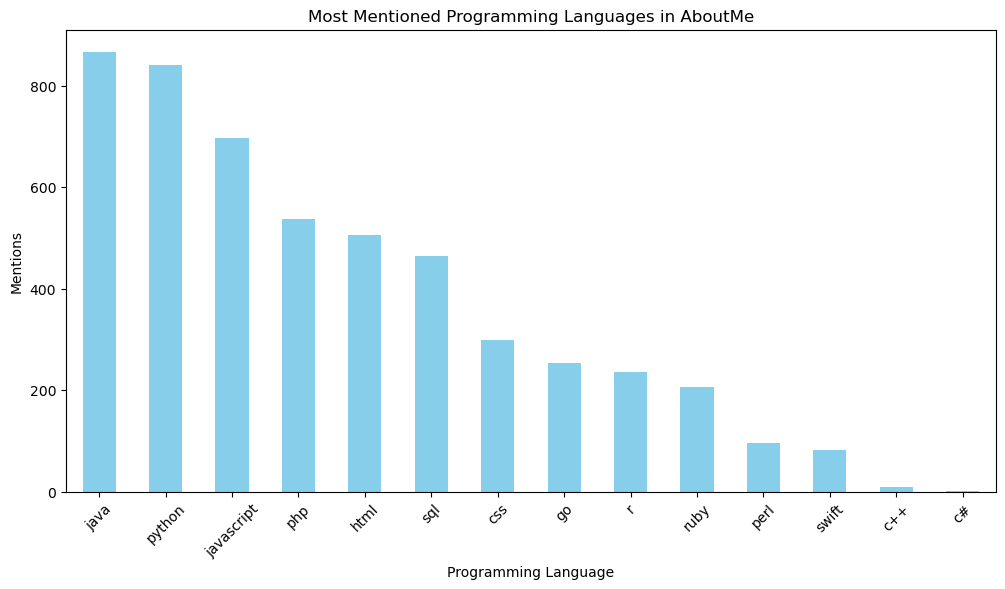

In [7]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Text Processing on AboutMe Column ---
# Extract keywords (e.g., programming languages) from AboutMe using regex
# Example regex: Matches common programming languages
languages_regex = r"\b(Python|JavaScript|Java|C\+\+|C#|Ruby|Go|Swift|PHP|R|SQL|HTML|CSS|Perl)\b"

def extract_languages(text):
    if isinstance(text, str):
        return re.findall(languages_regex, text, flags=re.IGNORECASE)
    return []

Users_df['ExtractedLanguages'] = Users_df['AboutMe'].apply(extract_languages)

# Aggregate and count occurrences of each language
all_languages = [lang.lower() for sublist in Users_df['ExtractedLanguages'] for lang in sublist]
language_counts = pd.Series(all_languages).value_counts()

# Visualization 1: Bar chart of programming language mentions
plt.figure(figsize=(12, 6))
language_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Most Mentioned Programming Languages in AboutMe')
plt.xlabel('Programming Language')
plt.ylabel('Mentions')
plt.xticks(rotation=45)
plt.show()




## Top User Locations

Extracted country/region information from the Location column using regex.

Displayed a horizontal bar chart of the top 15 user locations.

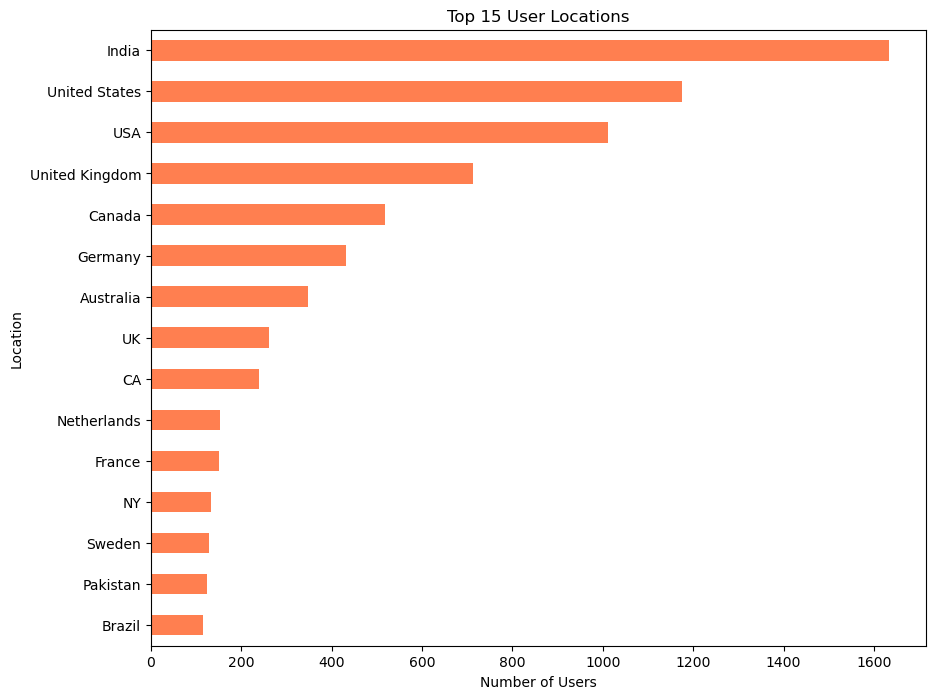

In [8]:

# --- Text Processing on Location Column ---
# Extract country/region keywords using regex (simplified example)
def extract_country(location):
    if isinstance(location, str):
        match = re.search(r"\b([A-Za-z\s]+)\b$", location)
        return match.group(1) if match else None
    return None

Users_df['ExtractedCountry'] = Users_df['Location'].apply(extract_country)

# Count occurrences of extracted countries
country_counts = Users_df['ExtractedCountry'].value_counts()

# Visualization 2: Horizontal bar chart of user locations
plt.figure(figsize=(10, 8))
country_counts.head(15).sort_values().plot(kind='barh', color='coral')
plt.title('Top 15 User Locations')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()

## Word Cloud



Created a word cloud based on the content of the AboutMe column to visualize the most frequently used words.

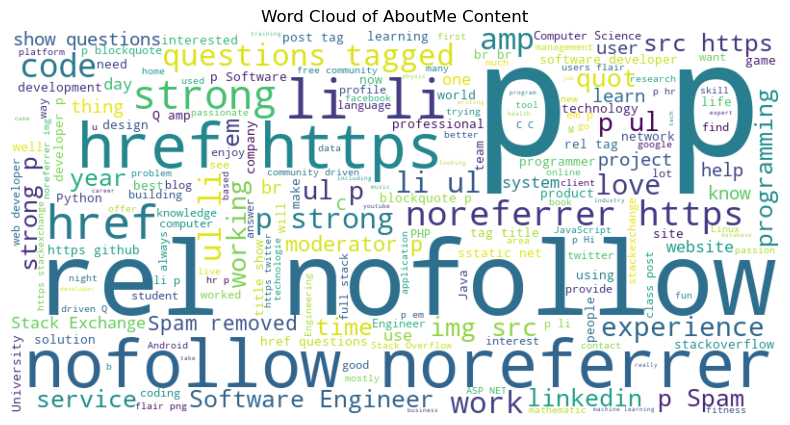

In [9]:

# --- Generate a Word Cloud ---
# Combine all AboutMe text into a single string for word cloud
all_about_me_text = " ".join(Users_df['AboutMe'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_about_me_text)

# Visualization 3: Word cloud of AboutMe content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of AboutMe Content')
plt.show()

### Analyze Voting Patterns Over Time

Use Votes_df to analyze how voting activity changes over time.


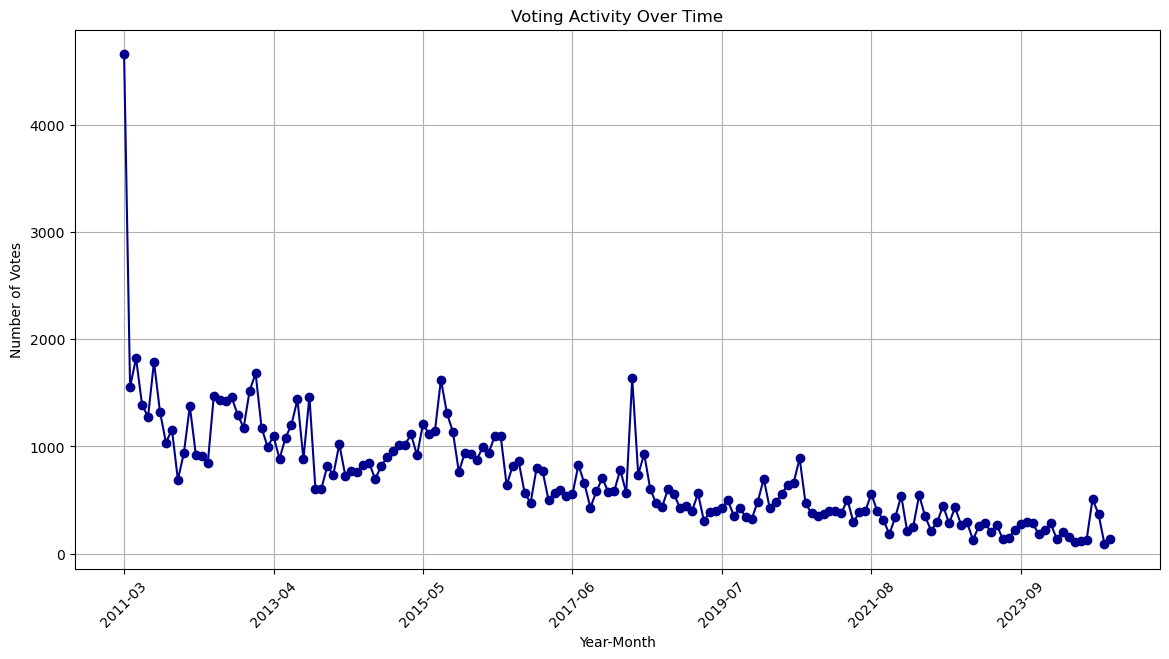

In [10]:
# Extract year and month from CreationDate
Votes_df['YearMonth'] = Votes_df['CreationDate'].str.extract(r'(\d{4}-\d{2})')

# Count votes per month
votes_per_month = Votes_df['YearMonth'].value_counts().sort_index()

# Plot a time series of voting activity
plt.figure(figsize=(14, 7))
votes_per_month.plot(kind='line', color='darkblue', marker='o')
plt.title('Voting Activity Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Votes')
plt.grid()
plt.xticks(rotation=45)
plt.show()


### Extract Top Keywords from Comments


Use Comments_df to extract and count keywords using regex. Plot the most frequent ones.


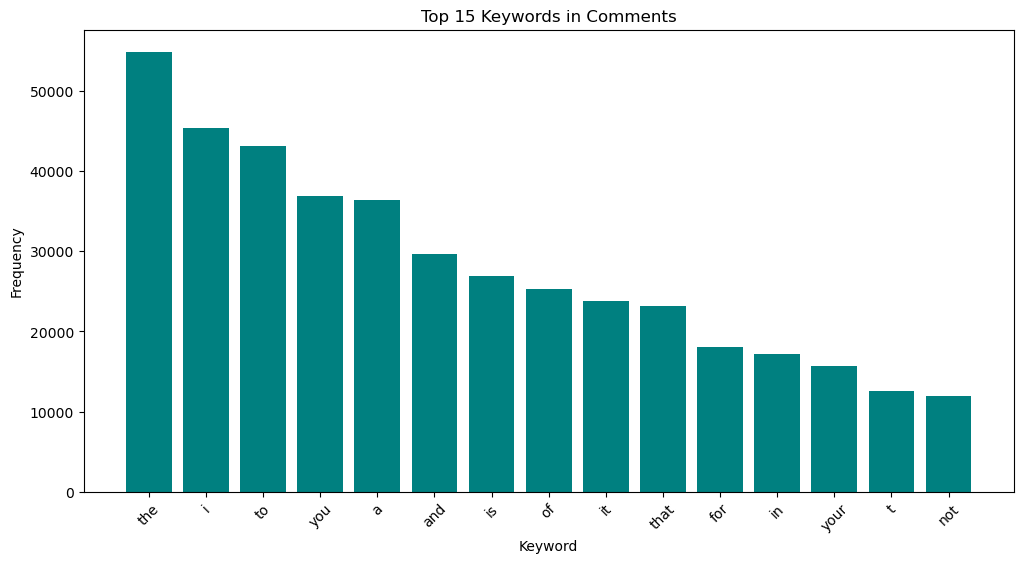

In [11]:
from collections import Counter

# Extract keywords from comments using regex
comments = Comments_df['Text'].dropna().str.lower()
keywords = [word for comment in comments for word in re.findall(r'\b\w+\b', comment)]

# Count the top 15 keywords
common_keywords = Counter(keywords).most_common(15)
keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
plt.bar(keywords_df['Keyword'], keywords_df['Frequency'], color='teal')
plt.title('Top 15 Keywords in Comments')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Analyze and Visualize Post Lengths


Use Posts_df to extract the length of post bodies and visualize their distribution.


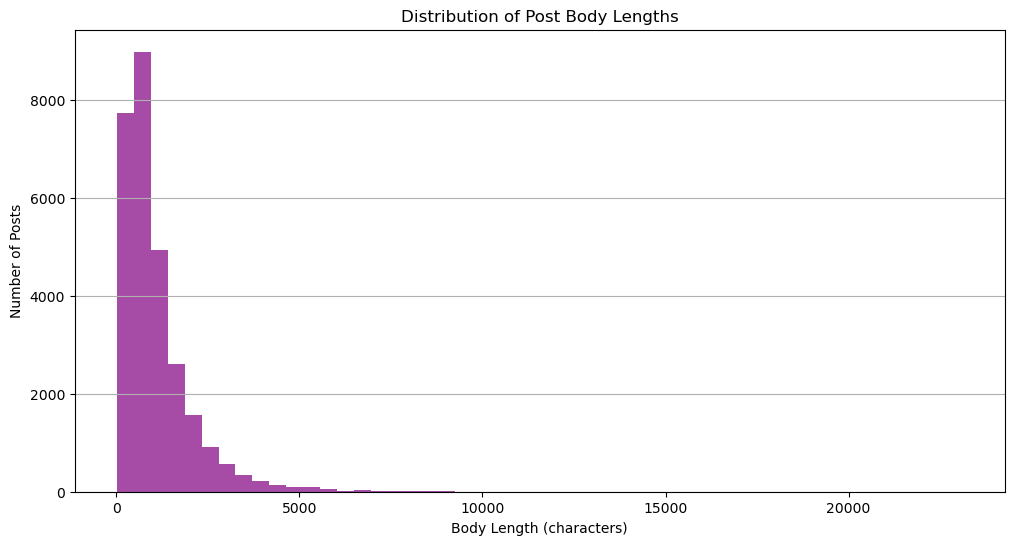

In [12]:
# Extract post body lengths
Posts_df['Body_Length'] = Posts_df['Body'].str.len()

# Plot a histogram of post lengths
plt.figure(figsize=(12, 6))
plt.hist(Posts_df['Body_Length'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Post Body Lengths')
plt.xlabel('Body Length (characters)')
plt.ylabel('Number of Posts')
plt.grid(axis='y')
plt.show()


### Create a Word Cloud of Tags


Use Tags_df to generate a word cloud of tag names based on their frequency.

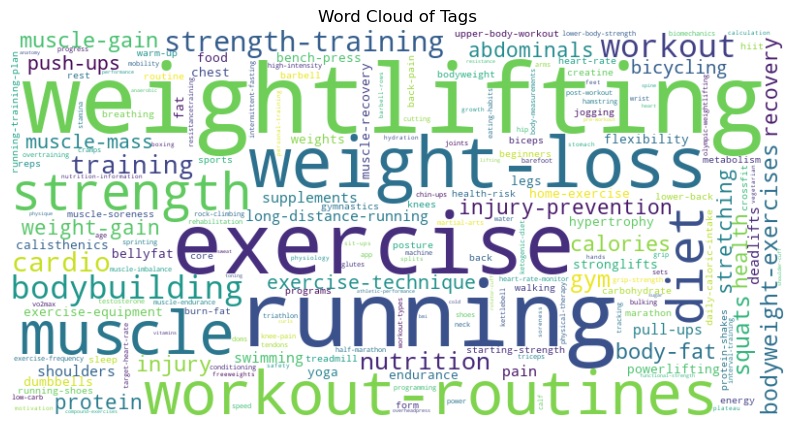

In [13]:
from wordcloud import WordCloud

# Generate a dictionary of tag frequencies
tag_freq = dict(zip(Tags_df['TagName'], Tags_df['Count']))

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_freq)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()


## Number of Users by Country (world map)

In [14]:
import plotly.express as px

# Extract country names from the Location column (simple example)
Users_df['Country'] = Users_df['Location'].str.split(',').str[-1].str.strip()

# Aggregate data by country
country_counts = Users_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'UserCount']


In [15]:
country_counts

Country  UserCount
0                           India       1632
1                   United States       1173
2                             USA       1010
3                  United Kingdom        713
4                          Canada        517
...                           ...        ...
1665  Distributed / Decentralized          1
1666                  Chicagoland          1
1667                    Rigel VII          1
1668                     The Grid          1
1669                  Aberdeen NC          1

[1670 rows x 2 columns]

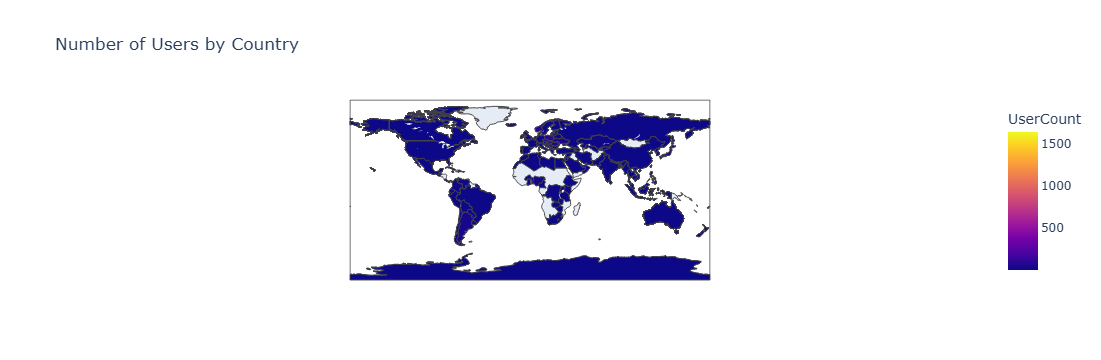

In [16]:
# Create a map
fig = px.choropleth(
    country_counts,
    locations="Country", 
    locationmode="country names",  
    color="UserCount",  
    hover_name="Country",  
    title="Number of Users by Country"
)

fig.show()

1 Geographic Dominance: A few countries (e.g., US, India) have the most users, indicating strong platform adoption there.

2 Growth Potential: Low user counts in some regions (e.g., Africa, South America) suggest untapped markets.

3 Language Barriers: Non-English-speaking countries may have fewer users, highlighting the need for localization.

4 Internet Access: User distribution aligns with internet penetration rates; low-access regions have fewer users.

5 Tech Hubs: Countries with strong tech industries (e.g., US, India) dominate, reflecting higher interest in tech topics.

6 Local Communities: Active local communities in high-user countries drive engagement and growth.

7 Time Zone Impact: User activity may peak in specific time zones, affecting event scheduling.

8 Economic Influence: Higher-income countries have more users due to better access to technology and education.

9 Education Correlation: Strong education systems in high-user countries suggest a link between skills and platform usage.

10 Content Strategy: Balancing global and localized content can attract a more diverse user base.

## Heatmap (Post Tags vs. Engagement)

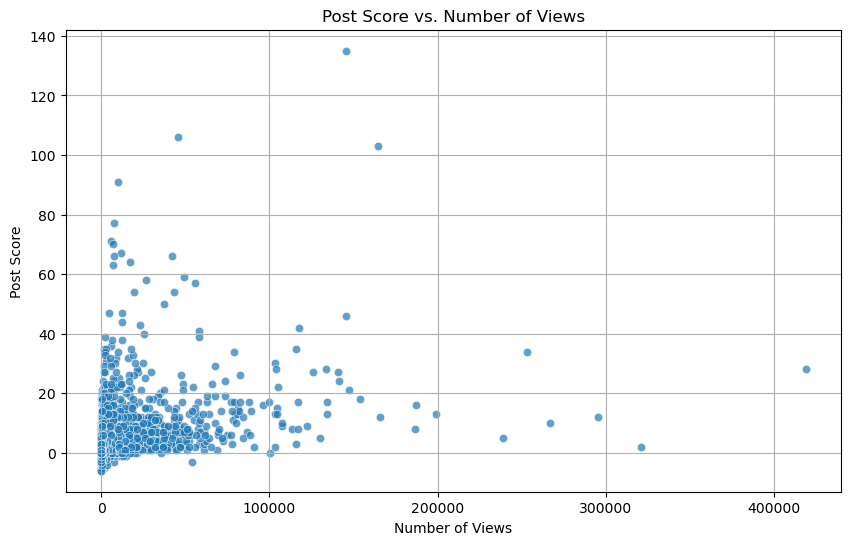

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
posts = pd.read_csv('Posts.csv')
votes = pd.read_csv('Votes.csv')

# Step 1: Aggregate vote metrics for each post
votes_summary = votes.groupby('PostId').agg({
    'VoteTypeId': [
        ('upvotes', lambda x: (x == 2).sum()),  # VoteTypeId 2 corresponds to upvotes
        ('downvotes', lambda x: (x == 3).sum()),  # VoteTypeId 3 corresponds to downvotes
    ]
}).reset_index()
votes_summary.columns = ['PostId', 'Upvotes', 'Downvotes']

# Merge with posts data
posts = posts.merge(votes_summary, left_on='Id', right_on='PostId', how='left')

# Fill missing upvotes and downvotes with 0
posts['Upvotes'] = posts['Upvotes'].fillna(0)
posts['Downvotes'] = posts['Downvotes'].fillna(0)

# Calculate metrics
posts['Score'] = posts['Upvotes'] - posts['Downvotes']  # Average score
posts['Engagement'] = posts['ViewCount'] + posts['Upvotes'] + posts['Downvotes']

# Scatter Plot (Post Score vs. Number of Views)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=posts, x='ViewCount', y='Score', alpha=0.7)
plt.title('Post Score vs. Number of Views')
plt.xlabel('Number of Views')
plt.ylabel('Post Score')
plt.grid(True)
plt.show()

# Extract tags and calculate engagement metrics per tag
posts['Tags'] = posts['Tags'].fillna('')  # Replace NaN tags with empty strings
tag_metrics = posts.explode('Tags')  # Explode tags if they are in a delimited format (e.g., <tag1><tag2>)
tag_metrics = tag_metrics.groupby('Tags').agg({
    'Engagement': 'mean',
    'Upvotes': 'mean',
    'ViewCount': 'mean'
}).reset_index()

# Filter top 20 tags for better visualization
top_tags = tag_metrics.sort_values(by='Engagement', ascending=False).head(20)



Post Score vs. Number of Views

Observation:

Most posts cluster at lower scores and views, indicating limited engagement for the majority.
A few outliers have high views and high scores, representing highly engaging posts.

Insight:

Posts with higher scores often attract more views, suggesting the audience rewards well-received posts.

## Heatmap: Engagement Metrics by Post Tags

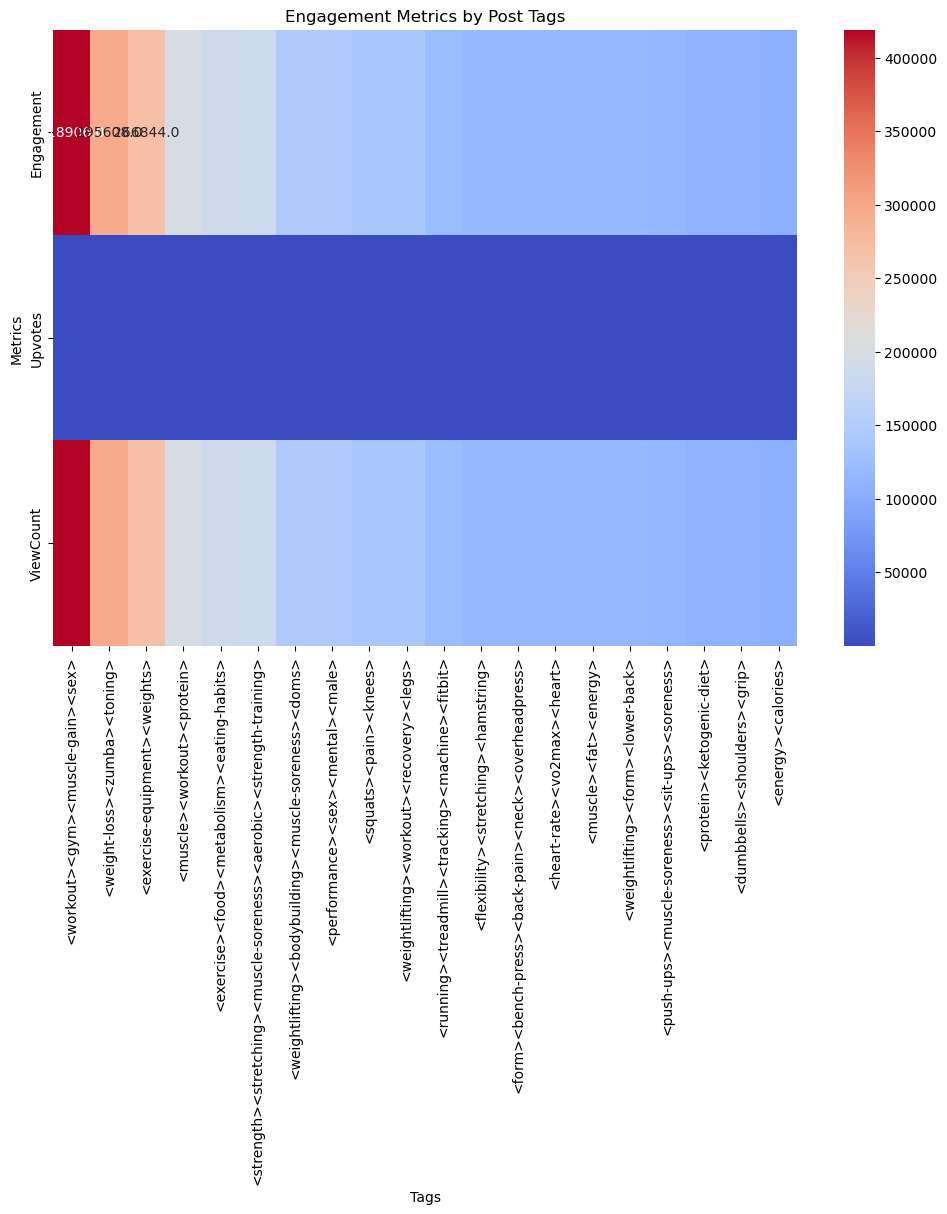

In [18]:

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap_data = top_tags.set_index('Tags').T  # Transpose for better layout
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)  # Corrected fmt=".1f"
plt.title('Engagement Metrics by Post Tags')
plt.ylabel('Metrics')
plt.xlabel('Tags')
plt.show()

#  Insights and Reflections on Data Privacy and Ethics in Analysis


### Textual Analysis of AboutMe
Insight: Extract and analyze text for common interests and skills.

Use regular expressions to extract key terms such as programming languages, technologies, and interests.

Visualize this information using word clouds and bar charts to determine trends in user expertise.

### Popularity of Tags and Topics

Insight: Analyze the Tags dataset (if available) for insights into popular topics.
    
Determine the most frequently used tags and their trends over time.
    
Cross-reference tag popularity with user engagement metrics like views or votes.

### Trends in Comments and Discussions
Insight: Process the Comments dataset to identify common words and phrases.

Apply sentiment analysis to understand the tone of discussions.

Identify keywords or topics that spark higher engagement.

### Temporal Patterns

Insight: Analyze temporal data such as account creation and last access dates.

Visualize trends in user registrations and activity over time.

Reflect on potential correlations with external events or platform updates.

## Number of Users by Country (world map)

1 Geographic Dominance: A few countries (e.g., US, India) have the most users, indicating strong platform adoption there.

2 Growth Potential: Low user counts in some regions (e.g., Africa, South America) suggest untapped markets.

3 Language Barriers: Non-English-speaking countries may have fewer users, highlighting the need for localization.

4 Internet Access: User distribution aligns with internet penetration rates; low-access regions have fewer users.

5 Tech Hubs: Countries with strong tech industries (e.g., US, India) dominate, reflecting higher interest in tech topics.

6 Local Communities: Active local communities in high-user countries drive engagement and growth.

7 Time Zone Impact: User activity may peak in specific time zones, affecting event scheduling.

8 Economic Influence: Higher-income countries have more users due to better access to technology and education.

9 Education Correlation: Strong education systems in high-user countries suggest a link between skills and platform usage.

10 Content Strategy: Balancing global and localized content can attract a more diverse user base.1 Geographic Dominance: A few countries (e.g., US, India) have the most users, indicating strong platform adoption there.

2 Growth Potential: Low user counts in some regions (e.g., Africa, South America) suggest untapped markets.

3 Language Barriers: Non-English-speaking countries may have fewer users, highlighting the need for localization.

4 Internet Access: User distribution aligns with internet penetration rates; low-access regions have fewer users.

5 Tech Hubs: Countries with strong tech industries (e.g., US, India) dominate, reflecting higher interest in tech topics.

6 Local Communities: Active local communities in high-user countries drive engagement and growth.

7 Time Zone Impact: User activity may peak in specific time zones, affecting event scheduling.

8 Economic Influence: Higher-income countries have more users due to better access to technology and education.

9 Education Correlation: Strong education systems in high-user countries suggest a link between skills and platform usage.

10 Content Strategy: Balancing global and localized content can attract a more diverse user base.

### Post Score vs. Number of Views

Observation:

Most posts cluster at lower scores and views, indicating limited engagement for the majority.
A few outliers have high views and high scores, representing highly engaging posts.

Insight:

Posts with higher scores often attract more views, suggesting the audience rewards well-received posts.

## Data Privacy and Ethics Reflection